# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot

In [4]:
# Importar PyTorch y otros módulos necesarios
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
import torchvision.transforms as transforms

### Download Cifar10 dataset

In [5]:
torch.cuda.is_available()

False

In [6]:
DATA_PATH = '/your_path'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:03<00:00, 42856207.01it/s]


Extracting /your_path/cifar-10-python.tar.gz to /your_path
Files already downloaded and verified
Files already downloaded and verified


In [7]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /your_path
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [8]:
train_loader.batch_size

64

In [9]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
          [-3.8586e-01, -2.5676e-01, -2.0834e-01,  ..., -3.3745e-01,
           -7.8932e-01, -1.0153e+00]],

         [[-1.2168e+00, -1.2018e+00, -1.2168e+00,  ..., -1.2619e+00,
           -1.1417e+00, -1.0065e+00],
          [-1.3821e+00, -1.5323e+00, -1.3070e+00,  ..., -1.1267e+00,
           -1.0666e+00, -1.2168e+00],
          [-1.2168e+00, -1.2318e+00, -1.1868e+00,  ..., -1.0966e+00,
           -1.3220e+00, -1.2318e+00],
          ...,
          [-1.1417e+00, -9.0128e-01, -9.1631e-01,  ..., -1.1417e+00,
           -1.1868e+00, -1.1116e+00],
          [-1.1868e+00, -1.0365e+00, -1.1567e+00,  ..., -1.0365e+00,
           -1.3370e+00, -1.4272e+00],
          [-1.1868e+00, -1.0966e+00, -1.2018e+00,  ..., -1.1717e+00,
           -1.3370e+00, -1.3821e+00]]],


        [[[-1.2099e+00, -1.7021e+00, -1.6703e+00,  ..., -1.2575e+00,
           -1.1464e+00, -1.0670e+00],
          [-1.1305e+00, -1.7973e+00, -1.8450e+00,  ..., -1.321

### Using  GPUs

In [10]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: automobile


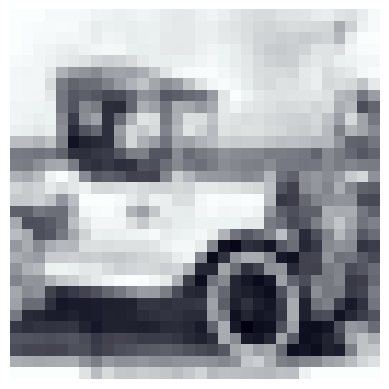

In [11]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


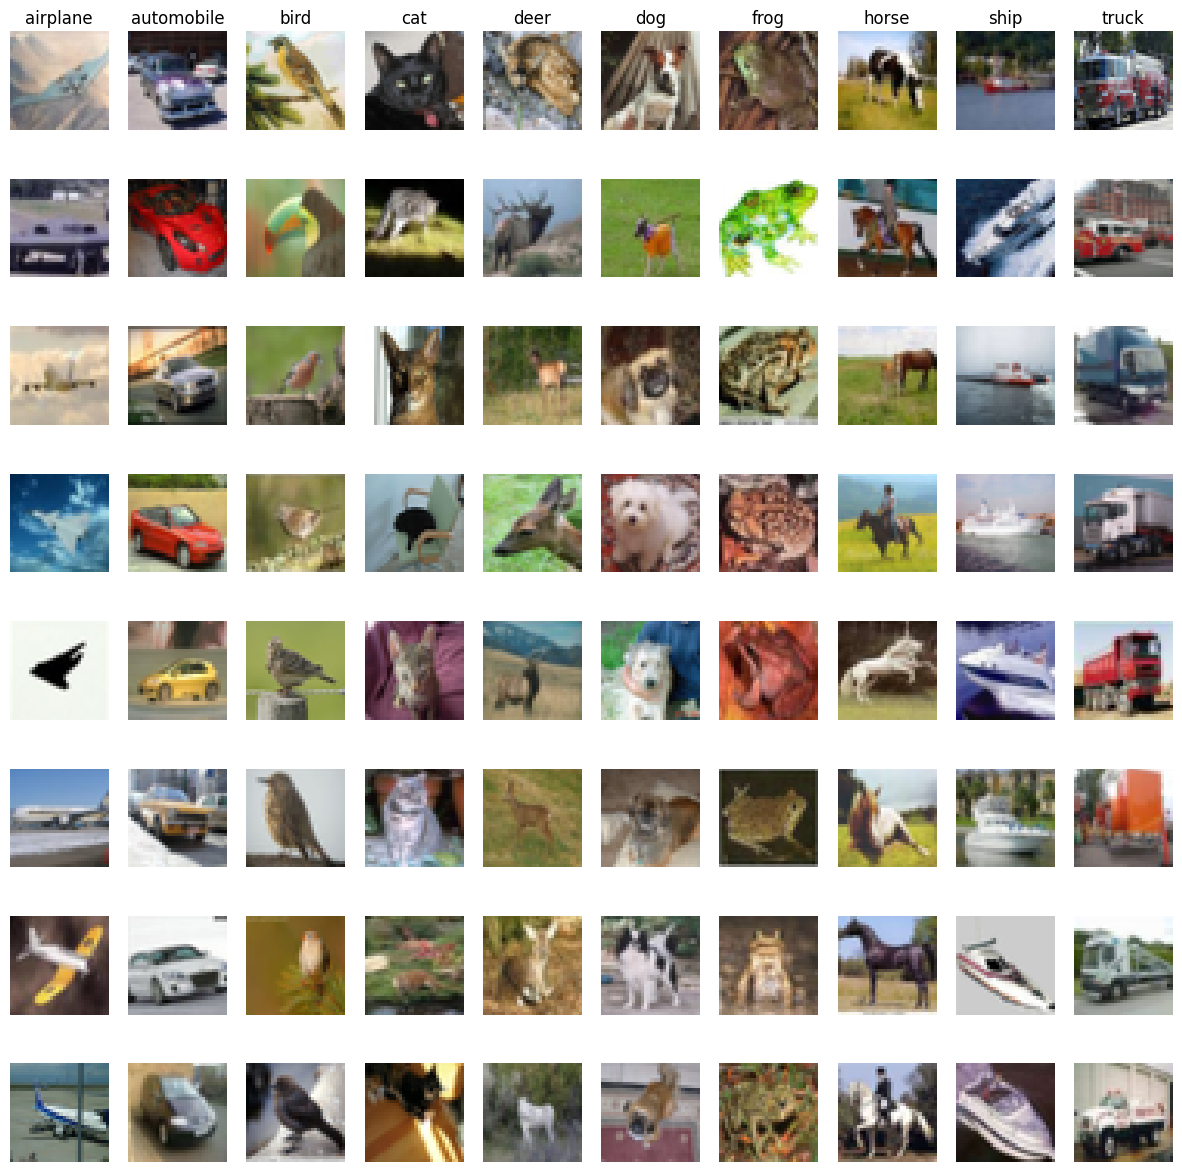

In [12]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [13]:
def accuracy(model, loader, device='cpu'):
    # Configura el modelo para evaluación
    model.eval()
    correct = 0
    total = 0

    # Desactiva el cálculo de gradientes para mejorar el rendimiento
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Obtiene las predicciones del modelo
            outputs = model(inputs)

            # Toma la clase con mayor valor (predicción)
            _, predicted = torch.max(outputs.data, 1)

            # Calcula el total de muestras correctas
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calcula el porcentaje de precisión
    return 100 * correct / total


### Loop de entrenamiento

In [14]:
# Función de entrenamiento adaptada para manejar ambos modelos
def train(model, train_loader, val_loader, optimizer, criterion, epochs=10, device='cpu'):
    model.to(device)

    for epoch in range(epochs):
        model.train()  # Poner el modelo en modo de entrenamiento
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Aplanar las entradas si es un modelo lineal
            if isinstance(model, LinearModel):
                inputs = inputs.view(inputs.size(0), -1)  # Aplanar solo si es un modelo lineal

            optimizer.zero_grad()  # Limpiar los gradientes

            outputs = model(inputs)  # Paso hacia adelante
            loss = criterion(outputs, labels)  # Calcular la pérdida

            loss.backward()  # Paso hacia atrás
            optimizer.step()  # Actualizar los pesos

            running_loss += loss.item() * inputs.size(0)

        # Imprimir la pérdida promedio por época
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader.dataset):.4f}')

        # Validación
        val_loss = 0.0
        model.eval()  # Poner el modelo en modo evaluación
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Aplanar las entradas si es un modelo lineal
                if isinstance(model, LinearModel):
                    inputs = inputs.view(inputs.size(0), -1)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

        print(f'Validation Loss: {val_loss/len(val_loader.dataset):.4f}')



### Linear model

In [15]:
# To do: Use PyTorch to create a linear model to have an initial baseline model

In [16]:
class LinearModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearModel, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        # Aplanar el tensor de entrada de (batch_size, 1, 28, 28) a (batch_size, 28*28)
        x = x.view(x.size(0), -1)
        out = self.fc(x)
        return out

### Sequential CNN

In [17]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model

In [18]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Capa convolucional 1 (3 canales de entrada para imágenes RGB)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Capa de pooling
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Capa convolucional 2
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Capa totalmente conectada (después de aplanar las características)
        self.fc2 = nn.Linear(128, num_classes)  # Capa de salida

    def forward(self, x):
        # Pasar la imagen a través de las capas convolucionales y de pooling
        x = self.pool(F.relu(self.conv1(x)))  # Salida de la primera capa convolucional
        x = self.pool(F.relu(self.conv2(x)))  # Salida de la segunda capa convolucional

        # Aplanar el tensor antes de pasarlo a la capa totalmente conectada
        x = x.view(x.size(0), -1)  # Aplanar

        # Pasar el tensor por las capas fully connected
        x = F.relu(self.fc1(x))  # Capa completamente conectada
        x = self.fc2(x)  # Capa de salida
        return x

In [21]:
# Crear el modelo lineal con tamaño de entrada ajustado para imágenes RGB (3 canales)
input_size = 3 * 32 * 32  # 3072 para imágenes RGB de 32x32 píxeles
model = LinearModel(input_size=input_size, num_classes=24)

# Definir el optimizador y la función de pérdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Entrenar el modelo lineal usando el loop de entrenamiento adaptado
train(model, train_loader, val_loader, optimizer, criterion, epochs=10, device='cpu')

# Evaluar el rendimiento en el conjunto de prueba
test_accuracy = accuracy(model, test_loader, device='cpu')
print(f'Linear Model Test Accuracy: {test_accuracy:.2f}%')

Epoch [1/10], Loss: 2.2577
Validation Loss: 1.0484
Epoch [2/10], Loss: 2.0482
Validation Loss: 1.0670
Epoch [3/10], Loss: 1.9679
Validation Loss: 1.0097
Epoch [4/10], Loss: 1.9248
Validation Loss: 0.9944
Epoch [5/10], Loss: 1.8917
Validation Loss: 0.9857
Epoch [6/10], Loss: 1.8777
Validation Loss: 0.9962
Epoch [7/10], Loss: 1.8618
Validation Loss: 0.9658
Epoch [8/10], Loss: 1.8692
Validation Loss: 0.9648
Epoch [9/10], Loss: 1.8560
Validation Loss: 0.9912
Epoch [10/10], Loss: 1.8506
Validation Loss: 0.9400
Linear Model Test Accuracy: 37.00%


In [20]:
# Crear el modelo CNN
model = CNNModel(num_classes=24)

# Definir el optimizador y la función de pérdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam funciona bien con redes convolucionales
criterion = nn.CrossEntropyLoss()  # Función de pérdida para clasificación multiclase

# Entrenar el modelo CNN usando el loop de entrenamiento adaptado
train(model, train_loader, val_loader, optimizer, criterion, epochs=10, device='cpu')

# Evaluar el rendimiento en el conjunto de prueba
test_accuracy = accuracy(model, test_loader, device='cpu')
print(f'CNN Model Test Accuracy: {test_accuracy:.2f}%')

Epoch [1/10], Loss: 1.3132
Validation Loss: 0.5333
Epoch [2/10], Loss: 0.9396
Validation Loss: 0.4392
Epoch [3/10], Loss: 0.7870
Validation Loss: 0.4288
Epoch [4/10], Loss: 0.6805
Validation Loss: 0.4217
Epoch [5/10], Loss: 0.5870
Validation Loss: 0.4215
Epoch [6/10], Loss: 0.5084
Validation Loss: 0.4242
Epoch [7/10], Loss: 0.4204
Validation Loss: 0.4422
Epoch [8/10], Loss: 0.3529
Validation Loss: 0.4940
Epoch [9/10], Loss: 0.2843
Validation Loss: 0.5354
Epoch [10/10], Loss: 0.2350
Validation Loss: 0.6038
CNN Model Test Accuracy: 71.20%
